In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
import treeprint
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
print(data, data2, data3)



(3,      Index  sepal.length  sepal.width  petal.length  petal.width         class
0        1          5.10         3.50          1.40         0.20   Iris-setosa
1        2          4.90         3.00          1.40         0.20   Iris-setosa
2        3          4.70         3.20          1.30         0.20   Iris-setosa
3        4          4.60         3.10          1.50         0.20   Iris-setosa
4        5          5.00         3.60          1.40         0.20   Iris-setosa
5        6          5.40         3.90          1.70         0.40   Iris-setosa
6        7          4.60         3.40          1.40         0.30   Iris-setosa
7        8          5.00         3.40          1.50         0.20   Iris-setosa
8        9          4.40         2.90          1.40         0.20   Iris-setosa
9       10          4.90         3.10          1.50         0.10   Iris-setosa
10      11          5.40         3.70          1.50         0.20   Iris-setosa
11      12          4.80         3.40          1

In [308]:
nrIterations = 20
nrDataSets = 3

accDT = np.zeros((nrDataSets,nrIterations))
accKNN = np.zeros((nrDataSets,nrIterations))
accSVM = np.zeros((nrDataSets,nrIterations))
accNB = np.zeros((nrDataSets,nrIterations))
accRFC = np.zeros((nrDataSets,nrIterations))
accNN = np.zeros((nrDataSets,nrIterations))
accAB = np.zeros((nrDataSets,nrIterations))


for i in range(nrDataSets):
    data = i
    print('DATAAAAAAA', i)
    for j in range(nrIterations):
        if data==0:
            X = data1[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']]
            y = data1['Type']
            attributeNames = [u'Sepal Length', u'Sepal Width', u'Petal Length', u'Petal Width']
            classNames = [u'Iris-setosa', u'iris-Virginica', u'Iris-versicolor']
        elif data==1:
            X = data2[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
            y = data2['class']
            attributeNames = [u'Sepal Length', u'Sepal Width', u'Petal Length', u'Petal Width']
            classNames = [u'Iris-setosa', u'iris-Virginica', u'Iris-versicolor', u'Iris_mythica']
        elif data==2:
            X = data3[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Attractiveness', 'LikelyToBuy', 'Review']]
            y = data3['Species']
            attributeNames = [u'Sepal Length', u'Sepal Width', u'Petal Length', u'Petal Width', u'Attractiveness', u'LikelyToBuy', u'Review']
            classNames = [u'setosa', u'virginica', u'versicolor']

#decision tree
        X_train, X_test, y_train, y_test = train_test_split(X, y)
        dtc = tree.DecisionTreeClassifier()   
        dtc = dtc.fit(X_train,y_train)
        #treeprint.tree_print(dtc, attributeNames, classNames)
        acc0 = dtc.score(X_test, y_test, sample_weight=None)
        accDT[i][j] = acc0
        #print('accuracy decision tree',acc0)

#K-Nearest Neighbours
        nb = 10 #neighBours
        dm = 2 #DistanceMeasure 

        neigh = KNeighborsClassifier(n_neighbors=nb, p=dm)
        neigh = neigh.fit(X_train,y_train) 
        predX = neigh.predict(X_test)
        acc1= accuracy_score(y_test, predX)
        accKNN[i][j] = acc1
#         print('accuracy KNN', acc1)

#support vector mashine
        clf = svm.SVC()
        prediction=clf.fit(X_train, y_train).predict(X_test)
        acc3=accuracy_score(y_test, prediction)
        accSVM[i][j] = acc3
        #print('accuracy SVM', acc3)

#naive bayes
        gnb = GaussianNB()
        predNB = gnb.fit(X_train, y_train).predict(X_test)
        acc4=accuracy_score(y_test, predNB)
        accNB[i][j]= acc4
        #print('accuracy NB', acc4)

#Random forest classifier
        clf = RandomForestClassifier(max_depth=None, random_state=0)
        predictionRFC=clf.fit(X_train, y_train).predict(X_test)
        acc5=accuracy_score(y_test, predictionRFC)
        accRFC[i][j]= acc5
        #print('accuracy RFC',acc5)

#neural network
        clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
        NN_prediction=clf.fit(X_train, y_train).predict(X_test)
        acc6=accuracy_score(y_test, NN_prediction)
        accNN[i][j]= acc6
        #print('accuracy NN',acc6)

#adaboost
        ABC_real = AdaBoostClassifier(n_estimators=100,  learning_rate=1)
        predictionABC=ABC_real.fit(X_train, y_train).predict(X_test)
        acc7=accuracy_score(y_test, predictionABC)
        accAB[i][j]=acc7
        #print('accuracy AdaBoost',acc7)

# print('Decision tree', accDT)
# print('KNN', accKNN)
# print('SVM', accSVM)
# print('NB', accNB)
# print('RFC', accRFC)
# print('NN', accNN)
# print('AB', accAB)

meansAccDT = [np.mean(accDT[0]), np.mean(accDT[1]), np.mean(accDT[2])]
meansAccKNN = [np.mean(accKNN[0]), np.mean(accKNN[1]), np.mean(accKNN[2])]
meansAccSVM = [np.mean(accSVM[0]), np.mean(accSVM[1]), np.mean(accSVM[2])]
meansAccNB = [np.mean(accNB[0]), np.mean(accNB[1]), np.mean(accNB[2])]
meansAccRFC= [np.mean(accRFC[0]), np.mean(accRFC[1]), np.mean(accRFC[2])]
meansAccNN = [np.mean(accNN[0]), np.mean(accNN[1]), np.mean(accNN[2])]
meansAccAB = [np.mean(accAB[0]), np.mean(accAB[1]), np.mean(accAB[2])]

print('Decision tree', meansAccDT)
print('KNN', meansAccKNN)
print('SVM', meansAccSVM)
print('NB', meansAccNB)
print('RFC', meansAccRFC)
print('NN', meansAccNN)
print('AB', meansAccAB)


('DATAAAAAAA', 0)
('DATAAAAAAA', 1)
('DATAAAAAAA', 2)
('Decision tree', [0.93947368421052624, 0.93900000000000006, 0.96052631578947345])
('KNN', [0.95657894736842086, 0.97000000000000008, 0.82236842105263153])
('SVM', [0.97105263157894706, 0.97200000000000009, 0.87368421052631573])
('NB', [0.96184210526315783, 0.96200000000000008, 0.93026315789473679])
('RFC', [0.95394736842105277, 0.95500000000000029, 0.94868421052631557])
('NN', [0.9526315789473685, 0.94999999999999996, 0.92368421052631577])
('AB', [0.92105263157894746, 0.60199999999999998, 0.93947368421052624])


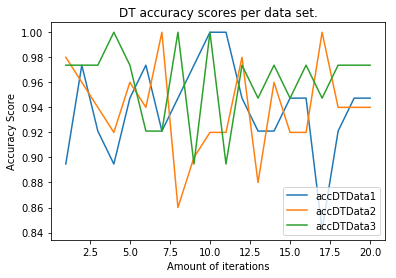

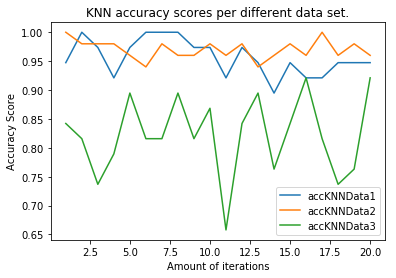

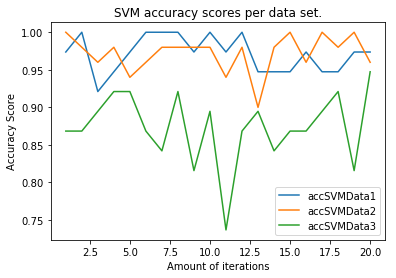

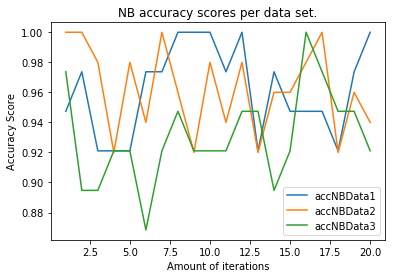

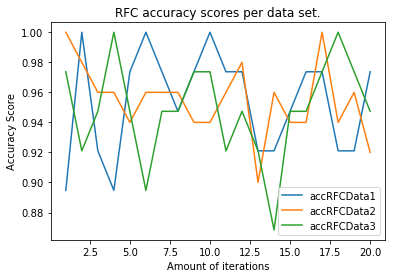

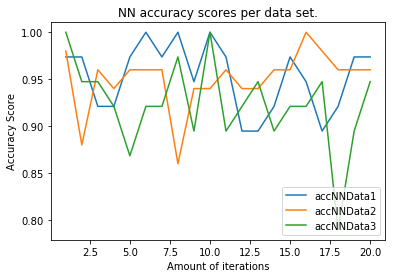

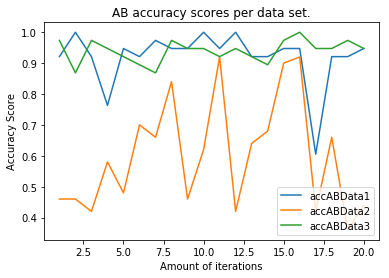

In [309]:
#Accuracy per classifier per data set plots: 

plt.plot(range(1,nrIterations+1),accDT[0],range(1,nrIterations+1),accDT[1],range(1,nrIterations+1),accDT[2])
plt.legend(['accDTData1', 'accDTData2', 'accDTData3'], loc=4)
plt.xlabel('Amount of iterations')
plt.ylabel('Accuracy Score')
plt.title('DT accuracy scores per data set.')
plt.show()

plt.plot(range(1,nrIterations+1),accKNN[0],range(1,nrIterations+1),accKNN[1],range(1,nrIterations+1),accKNN[2])
plt.legend(['accKNNData1', 'accKNNData2', 'accKNNData3'], loc=4)
plt.xlabel('Amount of iterations')
plt.ylabel('Accuracy Score')
plt.title('KNN accuracy scores per different data set.')
plt.show()

plt.plot(range(1,nrIterations+1),accSVM[0],range(1,nrIterations+1),accSVM[1],range(1,nrIterations+1),accSVM[2])
plt.legend(['accSVMData1', 'accSVMData2', 'accSVMData3'], loc=4)
plt.xlabel('Amount of iterations')
plt.ylabel('Accuracy Score')
plt.title('SVM accuracy scores per data set.')
plt.show()

plt.plot(range(1,nrIterations+1),accNB[0],range(1,nrIterations+1),accNB[1],range(1,nrIterations+1),accNB[2])
plt.legend(['accNBData1', 'accNBData2', 'accNBData3'], loc=4)
plt.xlabel('Amount of iterations')
plt.ylabel('Accuracy Score')
plt.title('NB accuracy scores per data set.')
plt.show()

plt.plot(range(1,nrIterations+1),accRFC[0],range(1,nrIterations+1),accRFC[1],range(1,nrIterations+1),accRFC[2])
plt.legend(['accRFCData1', 'accRFCData2', 'accRFCData3'], loc=4)
plt.xlabel('Amount of iterations')
plt.ylabel('Accuracy Score')
plt.title('RFC accuracy scores per data set.')
plt.show()

plt.plot(range(1,nrIterations+1),accNN[0],range(1,nrIterations+1),accNN[1],range(1,nrIterations+1),accNN[2])
plt.legend(['accNNData1', 'accNNData2', 'accNNData3'], loc=4)
plt.xlabel('Amount of iterations')
plt.ylabel('Accuracy Score')
plt.title('NN accuracy scores per data set.')
plt.show()

plt.plot(range(1,nrIterations+1),accAB[0],range(1,nrIterations+1),accAB[1],range(1,nrIterations+1),accAB[2])
plt.legend(['accABData1', 'accABData2', 'accABData3'], loc=4)
plt.xlabel('Amount of iterations')
plt.ylabel('Accuracy Score')
plt.title('AB accuracy scores per data set.')
plt.show()

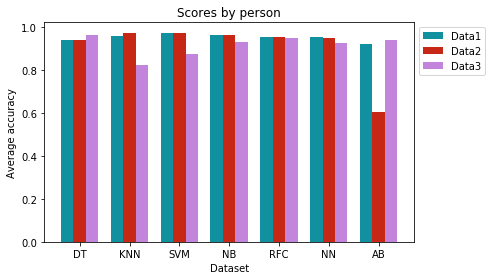

In [310]:
meansData1 = [meansAccDT[0], meansAccKNN[0], meansAccSVM[0], meansAccNB[0], meansAccRFC[0], meansAccNN[0], meansAccAB[0]]
meansData2 = [meansAccDT[1], meansAccKNN[1], meansAccSVM[1], meansAccNB[1], meansAccRFC[1], meansAccNN[1], meansAccAB[1]]
meansData3 = [meansAccDT[2], meansAccKNN[2], meansAccSVM[2], meansAccNB[2], meansAccRFC[2], meansAccNN[2], meansAccAB[2]]


index = np.arange(7)
bar_width = 0.25
opacity = 1
 
rects1 = plt.bar(index, meansData1, bar_width,
                 alpha=opacity,
                 color='#11909f',
                 label='Data1')
 
rects2 = plt.bar(index + bar_width, meansData2, bar_width,
                 alpha=opacity,
                 color='#c72816',
                 label='Data2')
 
rects3 = plt.bar(index + 2*bar_width, meansData3, bar_width,
                 alpha=opacity,
                 color='#c384db',
                 label='Data3')
 
plt.xlabel('Dataset')
plt.ylabel('Average accuracy')
plt.title('Scores by person')
plt.xticks(index + bar_width, ('DT', 'KNN', 'SVM', 'NB', 'RFC', 'NN', 'AB'))
plt.legend(bbox_to_anchor=(1, 1))
 
plt.tight_layout()
plt.show()

